In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())

    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data = data.drop(columns='User ID')

In [10]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [11]:
data.shape

(400, 4)

In [14]:
data = data.replace('Male',1)
data = data.replace('Female',0)

In [15]:
data.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [16]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


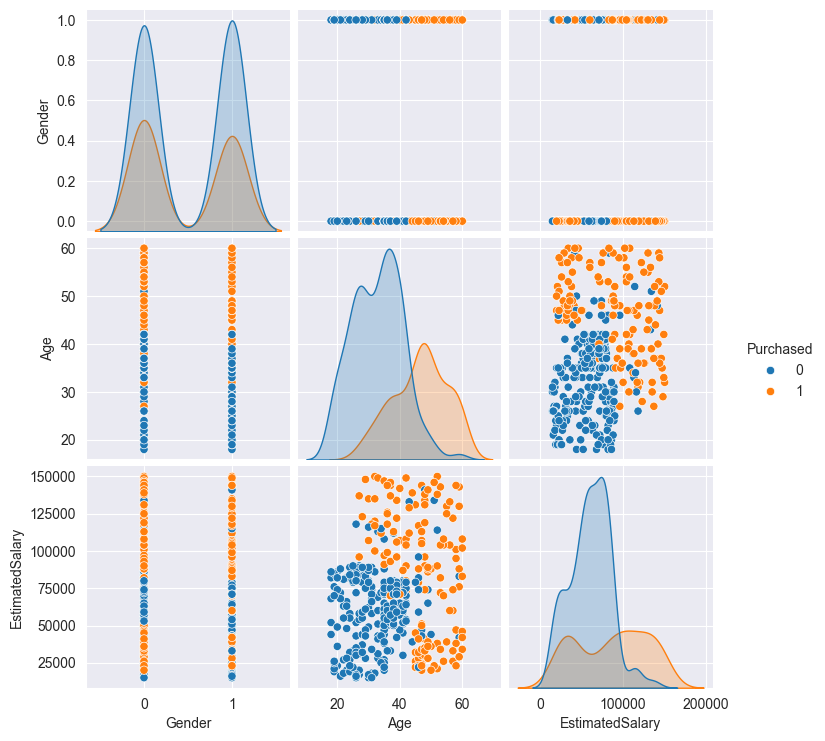

In [17]:
sns.pairplot(data, hue='Purchased')

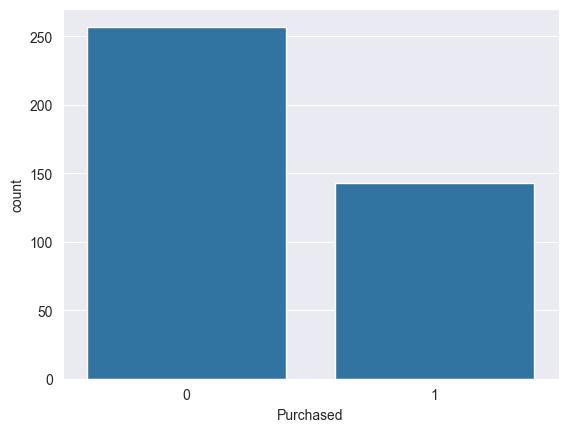

In [18]:
zx = sns.countplot(x='Purchased', data=data)

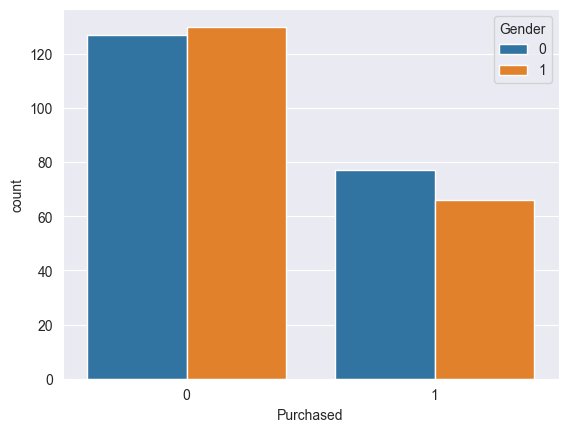

In [20]:
zx = sns.countplot(x='Purchased', data=data, hue='Gender')

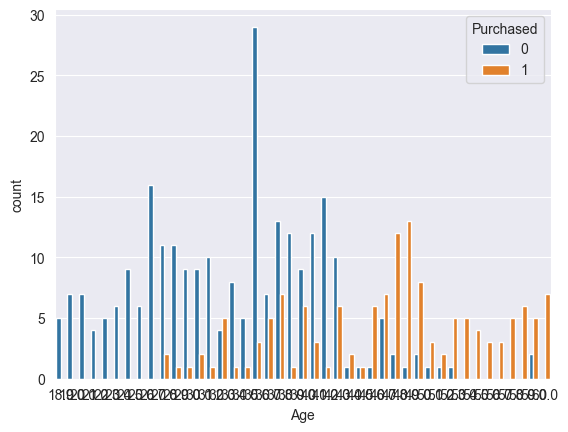

In [21]:
zx = sns.countplot(x='Age', data=data, hue='Purchased')

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = data.drop(columns='Purchased')

In [27]:
x = data.drop(columns='Purchased')
y = data['Purchased']

vif = pd.DataFrame()
vif['feature'] = x.columns

vif["VIP"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]

print(vif)


           feature       VIP
0           Gender  1.783132
1              Age  5.122407
2  EstimatedSalary  4.601775


In [28]:
# input data processing

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)
data_scaled.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [34]:
#build model(lr)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
lr.score(X_train, y_train)

0.828125

In [38]:
y_pred = lr.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [40]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


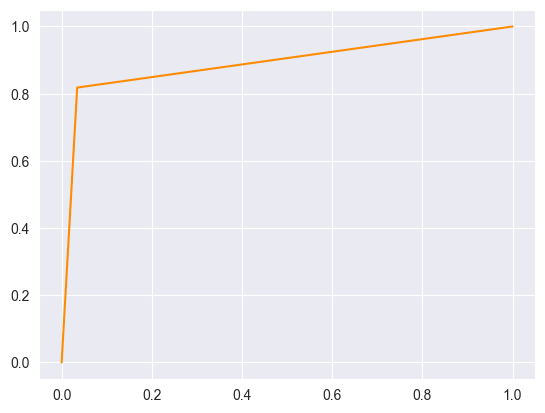

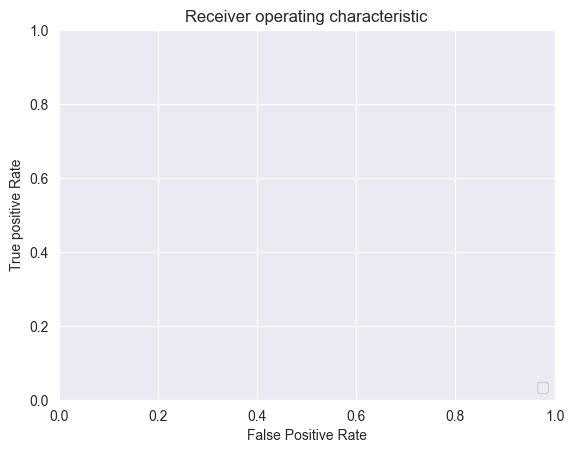

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve',color='darkorange')
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()


In [42]:
import sklearn
print(sklearn.__version__)

1.4.0


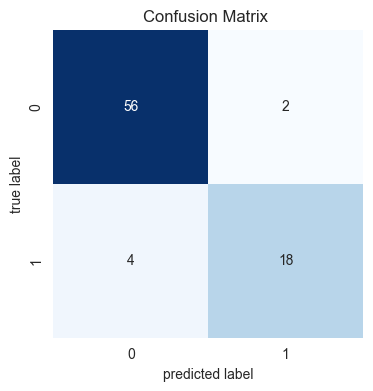

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix ')
plt.show()

In [44]:
accuracy_score(y_test, y_pred)

0.925